# <div align = 'center'> Lectura 6 Series de Tiempo II</div>
### Contenido
  <div align = 'left'>
      <font color = 'steelblue' size = 4>
        6.1 Trabajando con fechas <br>
        6.2 Graficar series de tiempo <br>
        6.3 Analizando tendencias <br>
        6.4 Media móvil simple <br>
        6.5 Analizando la estacionalidad <br>
          </font>
        </div>


Una serie de tiempo se define como un conjunto de valores que cambian a intervalos de tiempo iguales.

Ejemplo de serie temporal:
* Valor de los activos en bolsa
* Población de un país
* Demanda de un producto en particular

Los modelos utilizados para describir series de tiempo son procesos estocásticos, es decir, procesos controlados por leyes probabilísticas.

Tenemos en la literatura una gran cantidad de modelos diferentes para describir el comportamiento de una serie en particular. La construcción de estos modelos depende de varios factores, como el comportamiento del fenómeno o el conocimiento a priori que tenemos de su naturaleza y el objetivo del análisis. El paquete ```pandas``` tiene un conjunto de características que ayudan en el análisis de series de tiempo. Para presentar estas características, usaremos los datos contenidos en el archivo ```timeline.csv``` que representa las tendencias de las búsquedas en Internet.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('timeline.csv')
df.head()

,month,diet,gym,finance
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


En este ejemplo, tenemos tres temas de encuesta con estadísticas de encuestas recopiladas mensualmente.

## Trabajando con fechas

Al ejecutar el comando ```DataFrame.info ()```, puede ver que la columna ```mes``` se ha interpretado como tipo``` objeto```.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   month    168 non-null    object
 1   diet     168 non-null    int64 
 2   gym      168 non-null    int64 
 3   finance  168 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 5.4+ KB


El primer paso en el análisis de series de tiempo es convertir la columna ```mes``` al tipo especial``` fecha y hora```. Para hacerlo, usaremos la función ```pd.to_datetime ()```.

In [2]:
df.month = pd.to_datetime(df.month)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   month    168 non-null    datetime64[ns]
 1   diet     168 non-null    int64         
 2   gym      168 non-null    int64         
 3   finance  168 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 5.4 KB


A continuación, transformaremos la columna ```mes``` como columna de índice para el resto usando el comando``` DataFrame.set_index () ```.

In [3]:
df.set_index('month', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 2004-01-01 to 2017-12-01
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   diet     168 non-null    int64
 1   gym      168 non-null    int64
 2   finance  168 non-null    int64
dtypes: int64(3)
memory usage: 5.2 KB


El efecto de esta transformación es crear un nuevo índice de tipo ```DatetimeIndex```.

In [4]:
df.head()

,diet,gym,finance
month,,,
2004-01-01,100,31,48
2004-02-01,75,26,49
2004-03-01,67,24,47
2004-04-01,70,22,48
2004-05-01,72,22,43


## Graficar series de tiempo
Inicialmente trazaremos los tres temas de tendencia. Para trazar todos los datos usando un solo gráfico usamos el comando ``` DataFrame.plot ()```. Para modificar el tamaño del gráfico, pasamos el parámetro ```figsize = (15, 6)```, aumentando el ancho y alto del gráfico a 15 y 6, respectivamente. La lista completa de parámetros se puede encontrar en la documentación disponible en https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html.

Text(0.5, 0, 'Data')

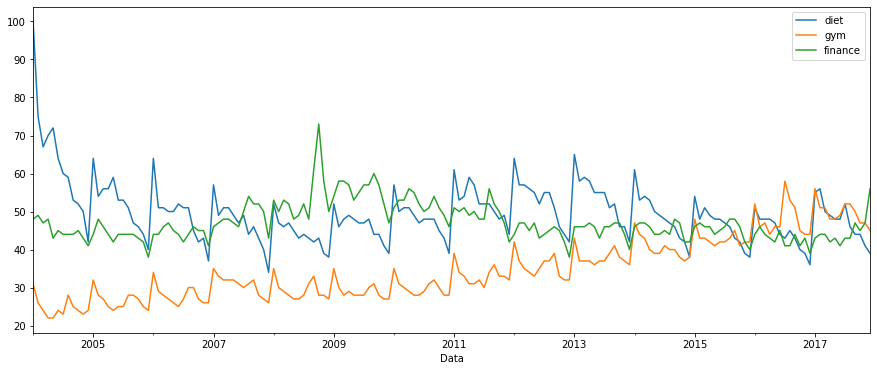

In [5]:
df.plot(figsize=(15, 6))
plt.xlabel('Data')

Observamos tres comportamientos distintos. Aparentemente, la frecuencia de las busquedas sobre la dieta disminuyó desde principios de 2004 hasta finales de 2017. La frecuencia de las busquedas sobre gimnasios parece haber aumentado durante el mismo período de tiempo. La busqueda sobre finanzas aparentemente se ha mantenido estable durante 13 años.

## Analizando tendencias
Solo analizaremos las investigaciones sobre alimentación. Tenga en cuenta que debido a la fluctuación de las busquedas, es difícil confirmar cualquier tipo de tendencia en la frecuencia de las busquedas. Estas fluctuaciones pueden ser causadas por la estacionalidad de la investigación o por su variabilidad natural.

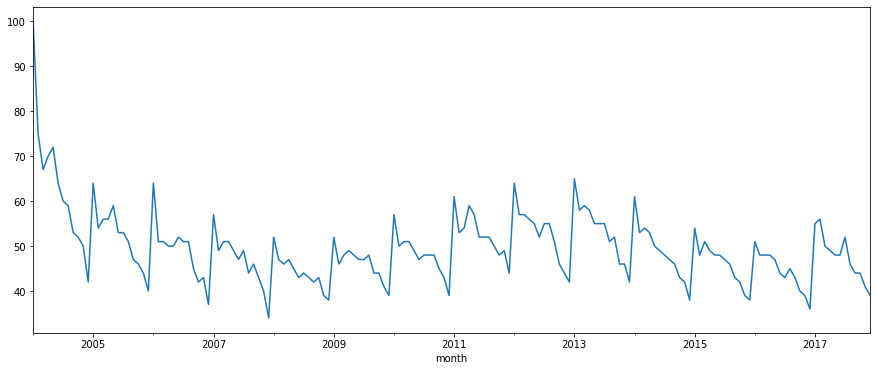

In [6]:
df.diet.plot(figsize=(15, 6))

### Media móvil simple (MMS)
Una de las técnicas comunes para eliminar el ruido es la aplicación de promedios móviles.

Considere la serie de tiempo $ Z_1, Z_2, \ldots, Z_n $.
La técnica de la media móvil consiste en calcular la media aritmética de las observaciones de $ k $ más recientes, es decir

$$ M_t = \frac {Z_t, Z_ {t-1}, \ldots, Z_ {t-k + 1}} {k} $$

Detonamos por $ k $ como la longitud media.

Para trazar promedios móviles para 12 períodos, usamos el comando ```Series.rolling(number_of_periods).mean().Plot()```.

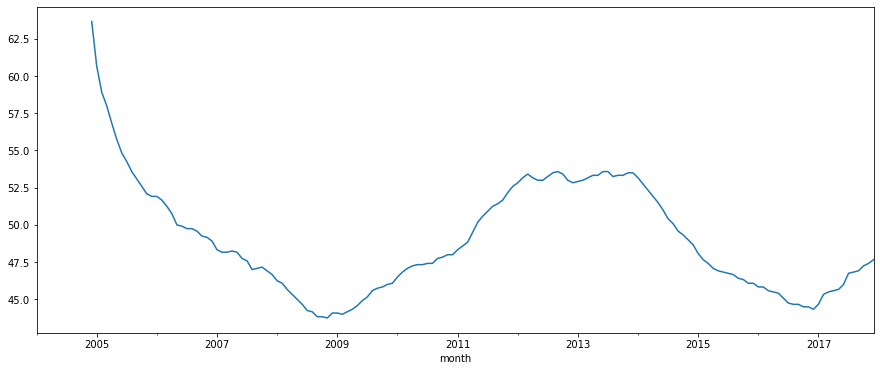

In [21]:
# df.diet
# df.diet.rolling(5).mean().head(15)
df.diet.rolling(12).mean().plot(figsize=(15, 6))

Analizando el gráfico de medias móviles, se puede ver con mayor claridad que la investigación sobre dieta estuvo en alza a principios de 2004 y sufrió una caída hasta finales de 2008. De 2009 a 2012 tuvo otro crecimiento, manteniéndose estable hasta 2014, donde sufrió otra caída hasta 2017.

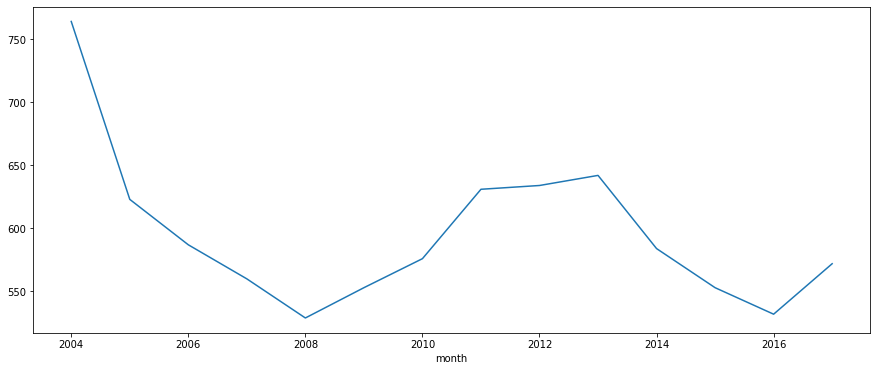

In [8]:
df.diet.groupby(df.index.year).sum().plot(figsize=(15, 6))

## Analizando la estacionalidad
A diferencia del análisis de tendencias, para analizar la estacionalidad de las busquedas dietéticas, necesitaremos eliminar la tendencia. Para ello utilizamos el concepto de diferencias.
### Diferencias
El procedimiento utilizado para eliminar la tendencia se conoce en la literatura como el procedimiento para transformar una serie no estacionaria en una serie estacionaria.

La transformación más común consiste en tomar sucesivas diferencias de la serie original hasta obtener una serie estacionaria. La primera diferencia $ Z (t) $ está definida por

$$ \Delta Z (t) = Z (t) - Z (t-1) $$

entonces la segunda diferencia es,

$$ \Delta ^ 2 Z (t) = \Delta [\Delta Z (t)] = \Delta [Z (t) - Z (t - 1)] $$
$$ \Delta ^ 2 Z (t) = Z (t) - 2 Z (t - 1) + Z (t -2) $$

En términos generales, la enésima diferencia de $ Z (t) $ es

$$ \Delta ^ n Z (t) = \Delta [\Delta ^ {n - 1} Z (t)] $$

Por lo general, solo se necesitarán una o dos diferencias para que la serie se vuelva estacionaria.

Para graficar las diferencias de $ n $, usamos el comando ```Series.diff (número_de_períodos)```.

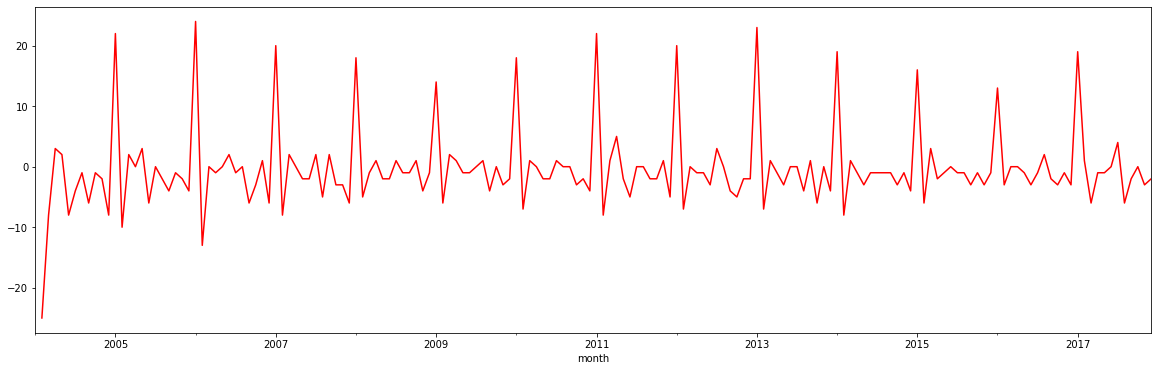

In [9]:
df.diet.diff(1).plot(figsize=(20, 6),color='red')

Para el caso estudiado, solo una diferencia fue suficiente para hacer estacionaria la serie.

Mirando el gráfico de arriba, es posible ver "picos" y "valles" recurrentes. Para mejorar la visualización, filtraremos los datos desde 2005-01 hasta 2007-12.

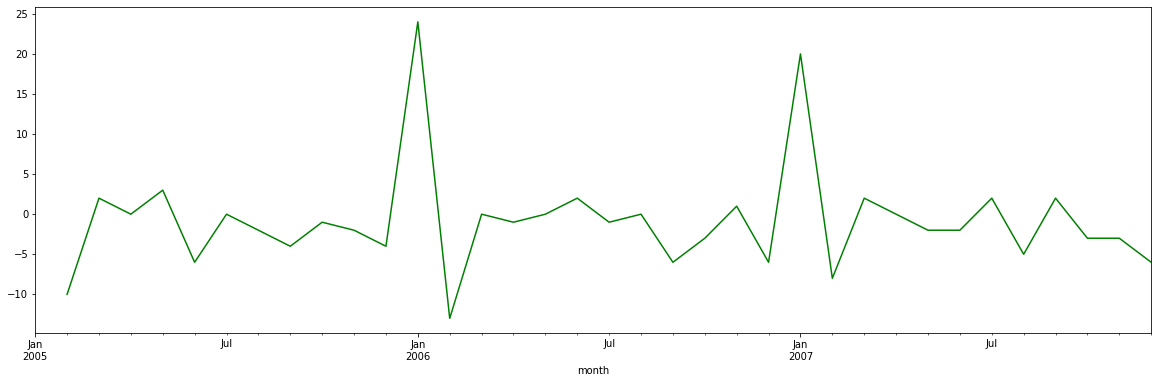

In [22]:
intervalo = (df.index.year >= 2005) & (df.index.year < 2008) 
df.diet[intervalo].diff().plot(figsize=(20, 6), color ='g')

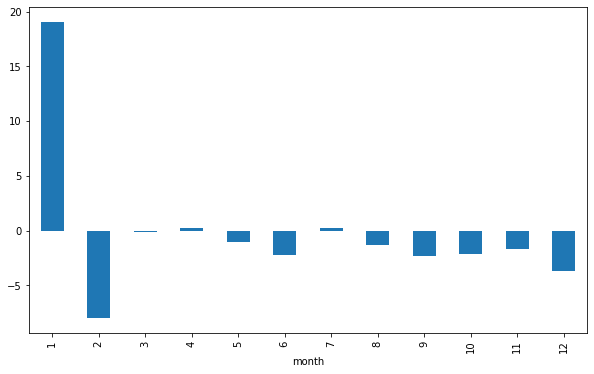

In [25]:
df.diet.diff(1).groupby(df.index.month).mean().plot(kind='bar', figsize=(10, 6))

En el gráfico anterior, se puede ver un patrón de comportamiento estacional, donde en enero hay un pico en la búsqueda sobre la dieta seguido de una fuerte caída en febrero. Durante el resto del año, la búsqueda se mantiene estable.